In [2]:
import pandas as pd
df=pd.read_csv('d:/data/hdi/hdi-data2.csv')
df.head()

,Life expectancy at birth,Mean years of schooling,Expected years of schooling,GNI,Export,HDI
0,48.4,3.5,8.2,280,85.119671,0.286
1,54.7,1.4,4.9,641,42.473864,0.295
2,50.4,2.7,10.5,368,42.473864,0.316
3,50.2,1.2,9.2,898,25.251291,0.322
4,49.6,1.5,7.2,1105,43.900000,0.328


In [5]:
train_cols=df.columns[0:5] #0~4
X=df[train_cols] #독립변수
y=df['HDI']  #종속변수

In [6]:
from scipy import stats
#단순회귀분석
#기대수명과 hdi의 관계
#귀무가설: 기대수명은 인간개발지수에 영향을 미치지 않는다.
#대립가설: 기대수명은 인간개발지수에 영향을 미친다.
x2=df['Life expectancy at birth'].values
y2=df['HDI'].values
result=stats.linregress(x2,y2) #회귀분석모형
result 
#pvalue=3.284775456269812e-69 95% 신뢰수준하에서 유의
#귀무가설 기각, 대립가설 채택
# 결론: 기대수명은 인간개발지수에 영향을 미친다.
# rvalue=0.9015129749487512 설명모형 90.1%

LinregressResult(slope=0.016124893707708518, intercept=-0.4599942026967768, rvalue=0.9015129749487512, pvalue=3.284775456269812e-69, stderr=0.000569086352615306)

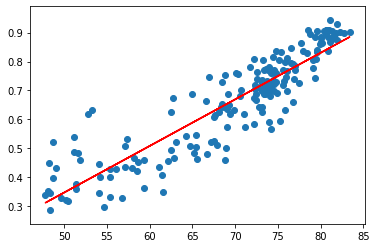

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
slope,intercept,rvalue,pvalue,stderr=stats.linregress(x2,y2)
plt.scatter(x2,y2) #산점도
plt.plot(x2,slope*x2+intercept,c='red') #회귀선

In [9]:
#단순회귀분석
#평균교육기간과 hdi의 관계
#귀무가설: 평균교육기간은 인간개발지수에 영향을 미치지 않는다.
#대립가설: 평균교육기간은 인간개발지수에 영향을 미친다.
x2=df['Mean years of schooling'].values
y2=df['HDI'].values
result=stats.linregress(x2,y2) #회귀분석모형
result 
#pvalue=3.284775456269812e-69 95% 신뢰수준하에서 유의
#귀무가설 기각, 대립가설 채택
# 결론: 기대수명은 인간개발지수에 영향을 미친다.
# rvalue=0.9015129749487512 설명모형 90.1%

LinregressResult(slope=0.05232467201381997, intercept=0.26456717569801413, rvalue=0.9005296673824348, pvalue=7.857605621580009e-69, stderr=0.0018574055433612294)

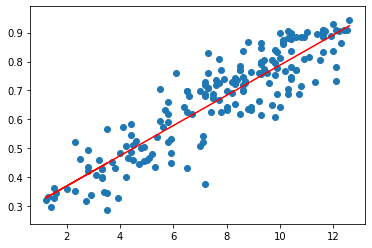

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
slope,intercept,rvalue,pvalue,stderr=stats.linregress(x2,y2)
plt.scatter(x2,y2) #산점도
plt.plot(x2,slope*x2+intercept,c='red') #회귀선

In [11]:
df.columns

Index(['Life expectancy at birth', 'Mean years of schooling',
       'Expected years of schooling', 'GNI', 'Export', 'HDI'],
      dtype='object')

In [18]:
#Export 변수를 제외한 모형
X=df[['Life expectancy at birth', 'Mean years of schooling',
       'Expected years of schooling', 'GNI']] #독립변수
y=df['HDI'] 

In [19]:
#다중회귀분석
import statsmodels.api as sm
model=sm.OLS(y,X) #다중회귀분석 모형
result=model.fit() #기계학습
result.summary() #모형 요약정보

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HDI   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.135e+04
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                   4.73e-243
Time:                        11:01:30   Log-Likelihood:                          380.29
No. Observations:                 187   AIC:                                     -752.6
Df Residuals:                     183   BIC:                                     -739.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Life expectancy at birth        0.0043      0.000     19.569      0.000       0.004       0.005
Mean years of schooling         0.0234      0.001     16.458      0.000       0.021       0.026
Expected years of schooling     0.0124      0.002      7.603      0.000       0.009       0.016
GNI                          2.458e-06   1.76e-07     13.998      0.000    2.11e-06     2.8e-06
==============================================================================
Omnibus:                       64.180   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.264
Skew:                          -1.458   Prob(JB):                     1.44e-38
Kurtosis:                       6.724   Cond. No.                     1.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#학습용:검증용 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=10)
model=LinearRegression().fit(X_train,y_train) #기계학습

In [21]:
print(model.score(X_train,y_train)) #학습용 예측 정확도
print(model.score(X_test,y_test)) #검증용 예측 정확도

0.9795835622122138
0.9431322148074942
